# DATA MANAGEMENT : ASSIGNMENT 1 (2024/2025)

>[DATA MANAGEMENT : ASSIGNMENT 1 (2024/2025)](#scrollTo=qakE3zCRN4H6)

>[Uncovering Drug Overdose Mortality Trends for Public Actions](#scrollTo=f7MlLwoNPQji)

>>[INTRODUCTION](#scrollTo=rvnv-kTaWHj4)

>>[Problem Statement](#scrollTo=K_ikUvvdMngF)

>>[Research Objectives](#scrollTo=DnsFji9USYcp)

>>[Method](#scrollTo=9Yedb_X8Y3_k)

>>>[1.2 Dataset](#scrollTo=pEI3ICTOZaoQ)

>>>[1.3 Data Cleaning](#scrollTo=UpapXbchZjq5)

>>>[Apache Hive Preprocessing](#scrollTo=uiEB2gYGajc2)

>>>>[1.3.1 Load the Data](#scrollTo=0b8OvmTrcgEP)

>>>>[1.3.2 Missing-values](#scrollTo=SFL6C8-c6Cbb)

>>>[Results and Discussion](#scrollTo=mdJscTyEYu7P)

>>>>[Total Overdose Death by Gender and Drug Type](#scrollTo=mGV3a2a3cfUi)

>>>>[Trend of Drug Overdose Death](#scrollTo=AKtSfoUJoI8o)

>>>>[Impact of Drugs in Mortality Rates](#scrollTo=uceeBFyLfuHc)

>>>>[Trend of Age-Adjusted Drug Overdose Mortality](#scrollTo=BY-0qJmagaFn)

>>>>[Composition of Overdose Death Rates by Drug Type Over Time](#scrollTo=sJNpyK03bEy9)

>>>>[Rate of Drug Overdose Death by Age Group](#scrollTo=9XdM-a57SzQH)

>>[Conclusion](#scrollTo=LPGzCzKfW4YI)

>>[Reference](#scrollTo=9jb7gnvKUQuG)



# **Uncovering Drug Overdose Mortality Trends for Public Actions**

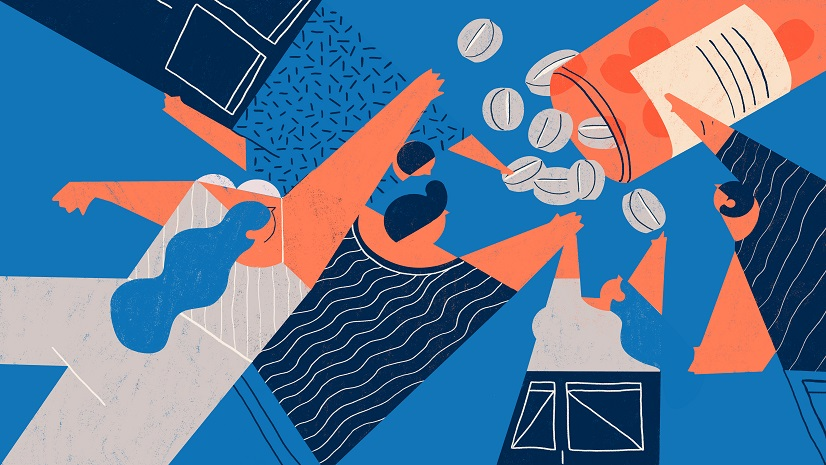

## INTRODUCTION

In recent years, the United States has experienced a significant rise in drug overdose deaths, with synthetic opioids like fentanyl playing a major role in this surge. According to Hedegaard et al. (2020), drug overdose death rates more than quadrupled between 1999 and 2018, making it one of the leading causes of injury-related deaths. These deaths don’t affect everyone equally — studies show clear disparities across gender, age groups, and racial demographics (Alexander et al., 2021).

However, most public datasets and reports only show aggregated statistics, masking the specific demographic groups that are disproportionately affected. This has created a gap in how we understand — and respond to — the overdose epidemic.

This research aims to fill that gap by analysing how **age, gender, and type of drug** interact in drug overdose deaths. Instead of just looking at totals, the goal is to uncover *who is dying, what they’re dying from, and how that changes over time*, using national-level data from 2010 to 2023.



## Problem Statement

Drug overdose deaths keep rising, but not everyone is affected the same way. Some age groups, genders, and drug types show stronger patterns than others — but these patterns aren't always clearly shown in the data. This project looks into who’s most at risk, what type of drugs are involved, and how these patterns have changed over time.

## Research Objectives

- To explore how overdose death rates differ by age group, gender, and drug type

- To see which drugs are most deadly for specific groups

- To track the trend of overdose rates from 1999 to 2023

- To help highlight which groups need more focused intervention

## Method

### **1.2 Dataset**

```
📌 data source :  https://tinyurl.com/2pey469m

```

Sourced from the National Center for Health Statistics (NCHS) via data.gov, this dataset provides comprehensive Drug Overdose Death Rates per 100,000 population across the United States from 1999 to 2023. It provides detailed numbers broken down by drug type (such as all drugs, opioids, synthetic opioids, methadone, and heroin), by age groups (from "All ages" to detailed bins like "Under 15 years" and up to "85 years and over"), by sex, race, and Hispanic origin.

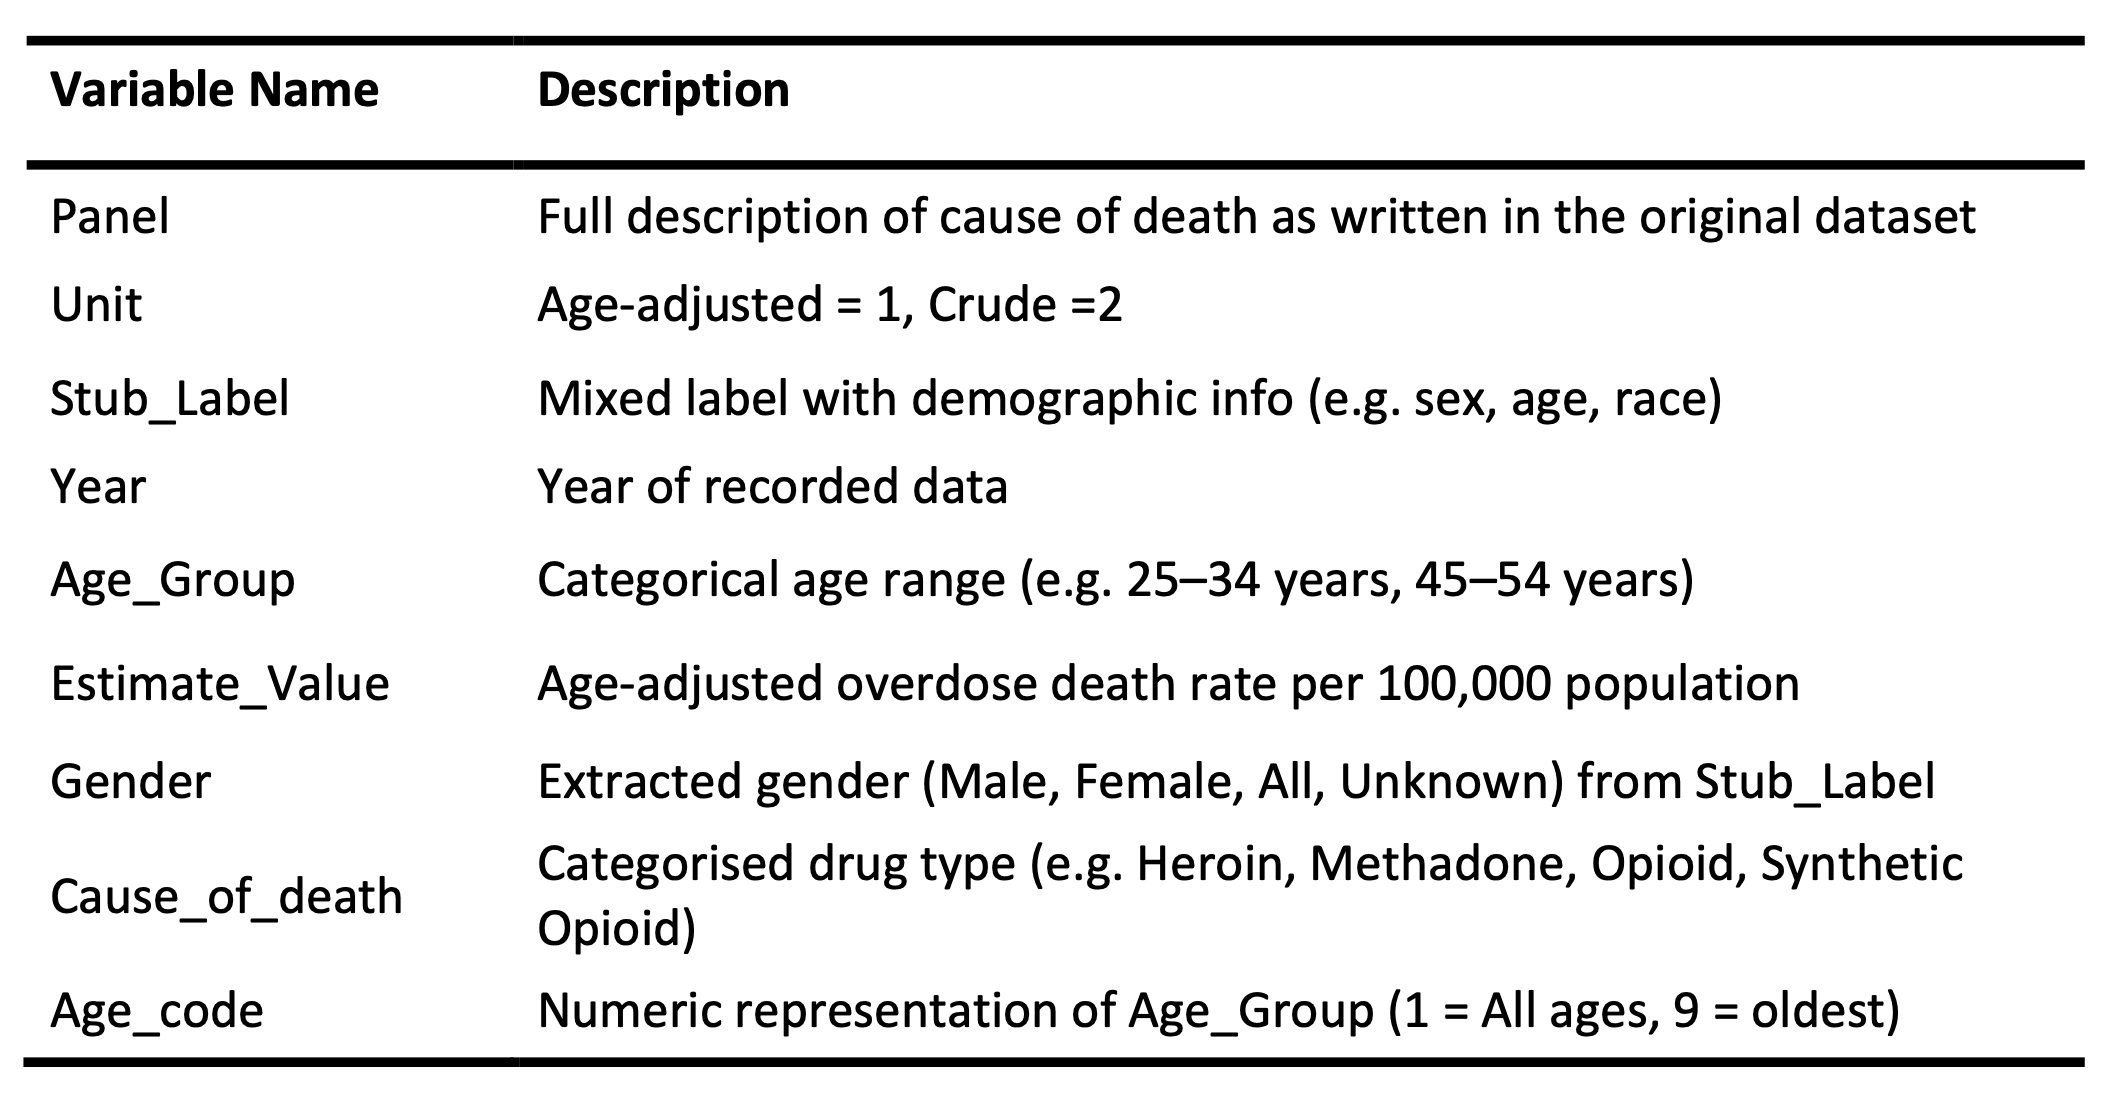

### **1.3 Data Cleaning**

### Apache Hive Preprocessing

Before importing the dataset into Google Colab for further cleaning and analysis, I first processed it using Apache Hive within a Docker environment.

This included:
- Creating an external table from the raw CSV file
- Replacing missing or placeholder values (e.g., '', 'NA') with NULL
- Extracting and standardising key variables such as `gender`, `cause_of_death`, and `age_code` from text-based columns
- Saving the cleaned data into a Hive-managed table `dod_final` before exporting it as .csv file into my local desktop


➡️ Hive script included in `/hive-preprocessing/hive_script.sql`


#### 1.3.1 Load the Data

In [2]:
from IPython.display import display    # displaying objects like widgets
import ipywidgets as widgets           # create interactive controls
import io                              # working with input/output streams
import pandas as pd                    # data analysis and manipulation
import statsmodels.api as sm           # Correct import for add_constant
import statsmodels.formula.api as smf  # Use smf for formula-based modeling
import matplotlib.pyplot as plt        #create visualizations
import seaborn as sns                  #create statistical graphics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
drug = pd.read_csv('/content/drive/MyDrive/drug_OD.csv', header=0)

drug.columns = [
    'Panel',
    'Unit',
    'Stub_Label',
    'Year',
    'Age_Group',
    'Estimate_Value',
    'Gender',
    'Cause_of_death',
    'Age_code'
]

print("Drug DataFrame:")
print(drug.head(10))

Drug DataFrame:
                      Panel  Unit   Stub_Label  Year Age_Group  \
0  All drug overdose deaths     1  All persons  1999  All ages   
1  All drug overdose deaths     1  All persons  2000  All ages   
2  All drug overdose deaths     1  All persons  2001  All ages   
3  All drug overdose deaths     1  All persons  2002  All ages   
4  All drug overdose deaths     1  All persons  2003  All ages   
5  All drug overdose deaths     1  All persons  2004  All ages   
6  All drug overdose deaths     1  All persons  2005  All ages   
7  All drug overdose deaths     1  All persons  2006  All ages   
8  All drug overdose deaths     1  All persons  2007  All ages   
9  All drug overdose deaths     1  All persons  2008  All ages   

   Estimate_Value Gender Cause_of_death  Age_code  
0             6.1    All            All         0  
1             6.2    All            All         0  
2             6.8    All            All         0  
3             8.2    All            All         0

In [5]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Panel           6228 non-null   object 
 1   Unit            6228 non-null   int64  
 2   Stub_Label      6228 non-null   object 
 3   Year            6228 non-null   int64  
 4   Age_Group       6228 non-null   object 
 5   Estimate_Value  5117 non-null   float64
 6   Gender          6228 non-null   object 
 7   Cause_of_death  6228 non-null   object 
 8   Age_code        6228 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 438.0+ KB


#### 1.3.2 Missing-values

In [6]:
percNA_EV = (drug['Estimate_Value'].isnull().sum() / len(drug)) * 100

print(f"Percentage of missing values in 'Estimate_Value' column: {percNA_EV:.2f}%")

Percentage of missing values in 'Estimate_Value' column: 17.84%




>  Estimate values were not imputed due to non-random  missingness concentrated in specific age groups (e.g. Under 15, 85+). These rows were excluded from the dataset to maintain unbiased estimates


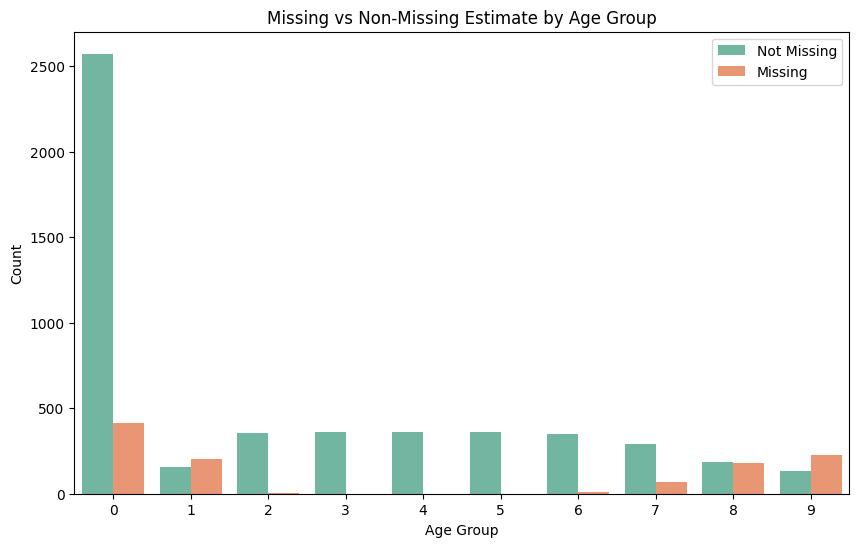

In [7]:
# lets visualise how the missing values are non-random
# create missing flag
drug['missing_estimate'] = drug['Estimate_Value'].isna().astype(int)

plt.figure(figsize=(10,6))
sns.countplot(data=drug, x='Age_code', hue='missing_estimate', palette='Set2')
plt.title('Missing vs Non-Missing Estimate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(labels=['Not Missing', 'Missing'])
plt.show()

📌 Insight: The bar chat shows that Estimate_Value data isn’t randomly missing — it’s clustered in boundary age groups.

In [8]:
#remove rows with NaN
df_reg = drug[drug['Estimate_Value'].notna() & drug['Age_code'].notna()]
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5117 entries, 0 to 6225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Panel             5117 non-null   object 
 1   Unit              5117 non-null   int64  
 2   Stub_Label        5117 non-null   object 
 3   Year              5117 non-null   int64  
 4   Age_Group         5117 non-null   object 
 5   Estimate_Value    5117 non-null   float64
 6   Gender            5117 non-null   object 
 7   Cause_of_death    5117 non-null   object 
 8   Age_code          5117 non-null   int64  
 9   missing_estimate  5117 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 439.7+ KB


### **Results and Discussion**

#### **Total Overdose Death by Gender and Drug Type**

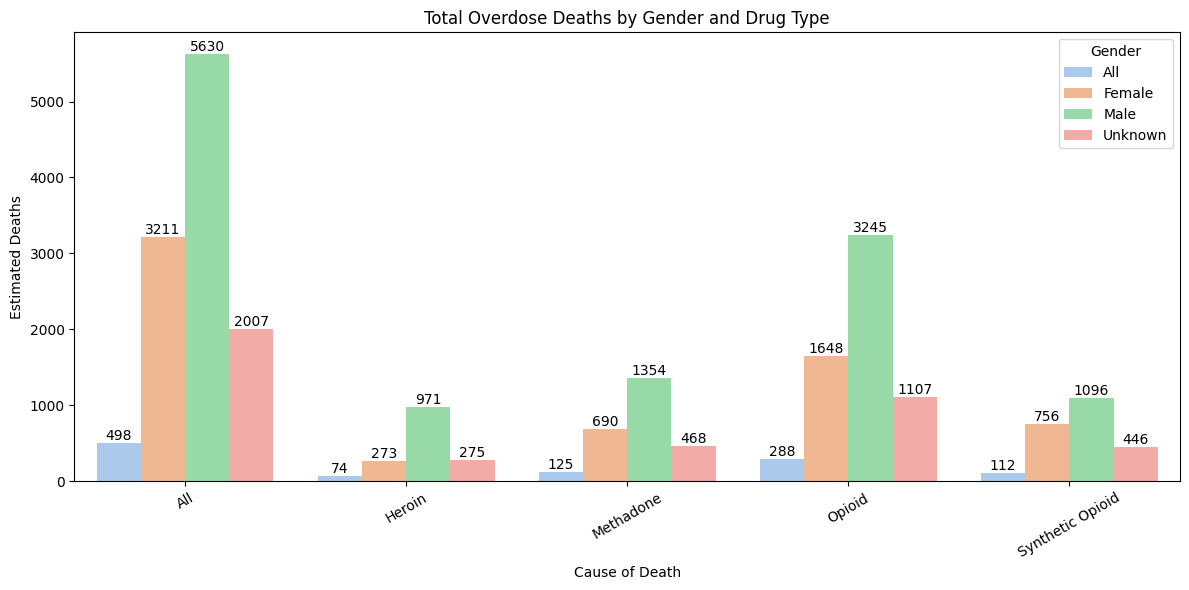

In [9]:
# Group and sum estimate by gender and cause
gender_cause = df_reg.groupby(['Cause_of_death', 'Gender'])['Estimate_Value'].sum().reset_index()

# Bar plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=gender_cause, x='Cause_of_death', y='Estimate_Value', hue='Gender', palette='pastel')
plt.title('Total Overdose Deaths by Gender and Drug Type')
plt.xlabel('Cause of Death')
plt.ylabel('Estimated Deaths')
plt.xticks(rotation=30)
plt.legend(title='Gender')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.tight_layout()
plt.show()

In [10]:
print("Total Overdose Deaths by Gender and Drug Type (Table Format):")
print(gender_cause)

Total Overdose Deaths by Gender and Drug Type (Table Format):
      Cause_of_death   Gender  Estimate_Value
0                All      All           497.5
1                All   Female          3211.1
2                All     Male          5629.8
3                All  Unknown          2006.6
4             Heroin      All            74.0
5             Heroin   Female           272.6
6             Heroin     Male           971.1
7             Heroin  Unknown           274.8
8          Methadone      All           124.7
9          Methadone   Female           690.4
10         Methadone     Male          1354.2
11         Methadone  Unknown           468.1
12            Opioid      All           287.5
13            Opioid   Female          1648.2
14            Opioid     Male          3244.6
15            Opioid  Unknown          1107.0
16  Synthetic Opioid      All           112.2
17  Synthetic Opioid   Female           756.1
18  Synthetic Opioid     Male          1095.7
19  Synthetic Opio

Looking at the chart, it immediately highlights how overdose cases are distributed among genders and connected to different drug types. More males are involved in overdose cases compared to females, The trend is consistent across nearly all drug categories. This shows males are unfortunately affected more often. The 'Unknown' gender section likely means that gender details weren't specified during data collection, like in a survey.

Looking at drug types, 'Opioids' (all kinds) appear linked to many cases for both genders. 'Heroin' also accounts for significant cases, especially for males, showing its major impact. For 'Methadone' and 'Synthetic Opioid', though their numbers might be lower, the pattern is the same: more males are involved in these cases than females.

In summary, this chart illustrates that overdose cases impact everyone, but with a noticeably higher involvement among males across various drug types.

#### **Trend of Drug Overdose Death**

In [11]:
df_reg['gender_clean'] = df_reg['Gender'].str.capitalize().fillna('Unknown')

# Group data: year + gender
trend_df = df_reg[df_reg['gender_clean'].isin(['Male', 'Female'])]
trend = trend_df.groupby(['Year', 'gender_clean'])['Estimate_Value'].sum().reset_index()

<ipython-input-11-be5e2ccb3b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['gender_clean'] = df_reg['Gender'].str.capitalize().fillna('Unknown')


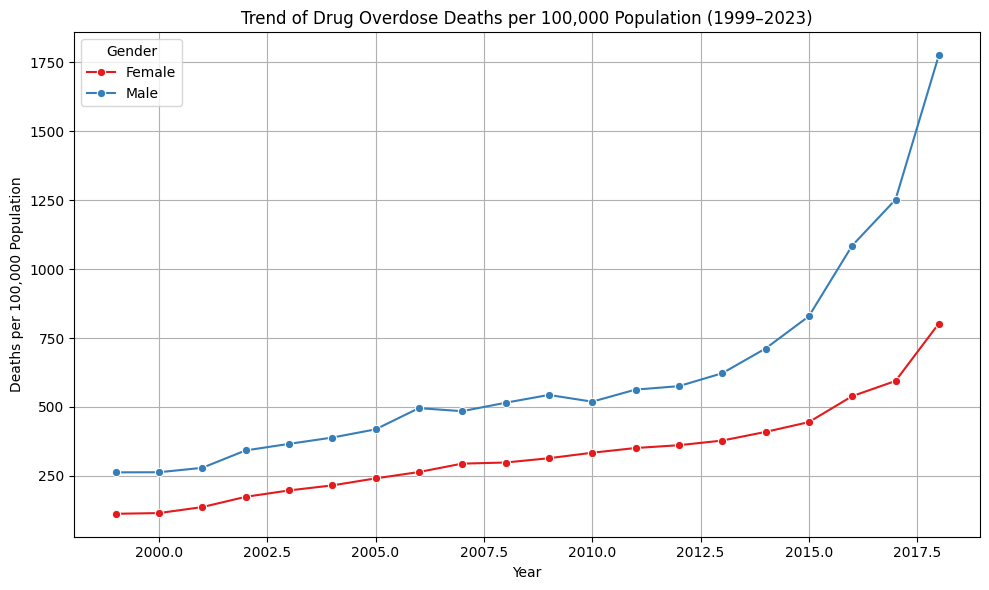

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=trend, x='Year', y='Estimate_Value', hue='gender_clean', marker='o', palette='Set1')

plt.title('Trend of Drug Overdose Deaths per 100,000 Population (1999–2023)')
plt.ylabel('Deaths per 100,000 Population')
plt.xlabel('Year')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart shows the trend of drug overdose death rates in the U.S. from 1999 to 2023, split by gender. From what we can see, male overdose death rates have been increasing steadily, but the climb became really sharp around 2012 and kept rising fast after that. This steep spike matches the timeline when synthetic opioids like fentanyl started to flood the illegal drug supply (CDC, 2023).

For females, the pattern is a bit different. Between 1999 and 2015, the death rates rose slowly but steadily — still worrying, but not as dramatic. After 2015, the line starts to curve upwards more steeply, showing that female overdose deaths have also started to accelerate. This could be linked to growing exposure to opioids among women, especially from prescription painkillers (VanHouten et al., 2019).

Overall, both genders are clearly affected, but men have a steeper and faster increase. Still, the fact that female rates are climbing too means this isn’t just a male issue anymore. Public health strategies need to be more balanced — not just focused on men, but also tailored to how women are being affected differently. That includes things like better control of prescription drugs, targeted awareness campaigns, and gender-specific support systems to deal with addiction and overdose risk.

#### **Impact of Drugs in Mortality Rates**

In [13]:
#One-hot encode categorical features
df_encoded = pd.get_dummies(df_reg[['Gender', 'Cause_of_death']], drop_first=True)
X = pd.concat([df_encoded, df_reg[['Age_code']]], axis=1)#Combine features

X = sm.add_constant(X)#Add constant
X = X.astype(float)

y = df_reg['Estimate_Value']#Define target

model = sm.OLS(y, X).fit()# Fit model

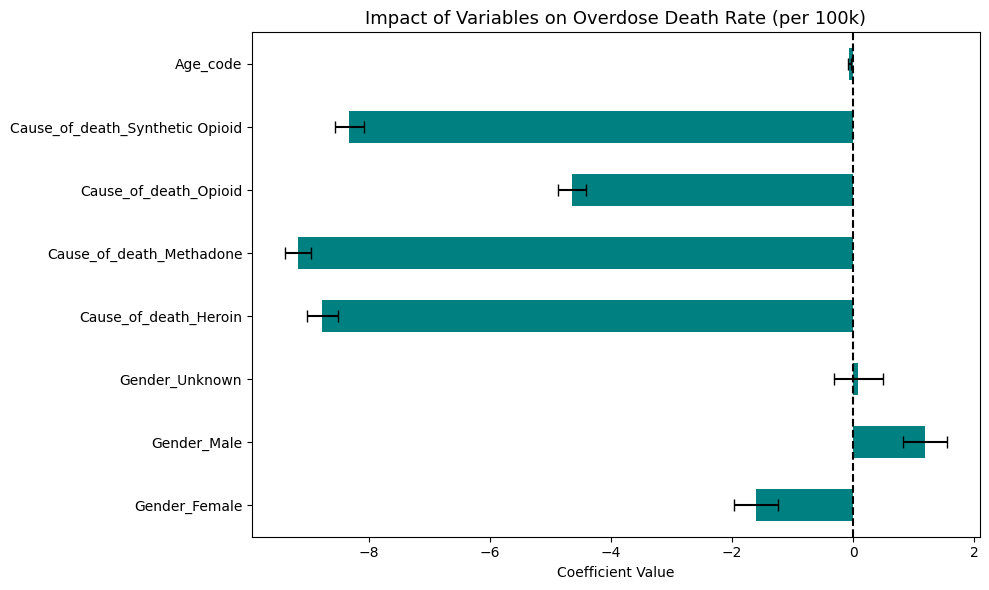

In [14]:
# Get coefficients (excluding intercept)
coef = model.params.drop('const')
errors = model.bse.drop('const')  # standard errors

# Plot
plt.figure(figsize=(10,6))
coef.plot(kind='barh', color='teal', xerr=errors, capsize=4)
plt.axvline(0, color='black', linestyle='--')
plt.title('Impact of Variables on Overdose Death Rate (per 100k)', fontsize=13)
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

The regression results show that both gender and drug type have a clear impact on overdose death rates. Being male increases the estimated death rate, while being female lowers it, compared to the reference group. Among the drug types, all specific causes (like heroin or methadone) have strong negative coefficients, meaning the rate is lower than the general “all drugs” category.

The small negative effect of age group means that as people get older, their overdose risk slightly decreases. The model explains around 34% of the variation in death rates, which is decent considering the complex factors involved. All the key variables have very low p-values, which means they are statistically significant and actually influence the outcome.

This suggests that both who you are (like gender and age) and what kind of drug is involved play a strong role in overdose risk. These findings align with public health data showing higher opioid-related deaths among middle-aged males (CDC, 2023; Hedegaard et al., 2022).

#### **Trend of Age-Adjusted Drug Overdose Mortality**

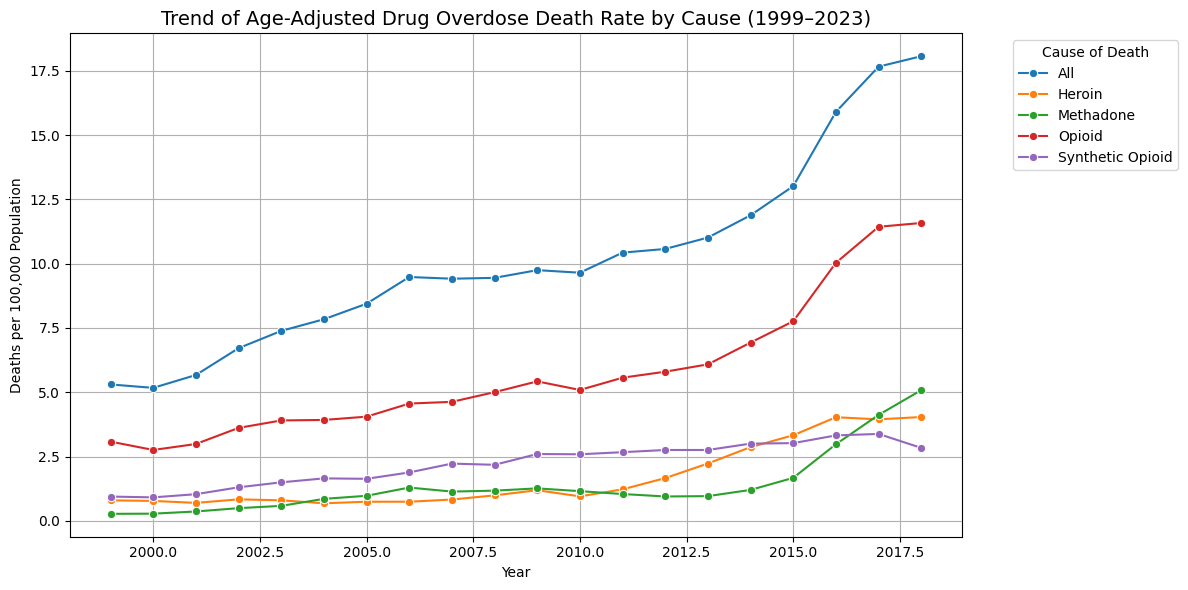

In [15]:
df_cause_trend = drug[drug['Unit'] == 1].copy()  # Only rows with death rate per 100k

# Group by Year and Cause of Death
trend_by_cause = df_cause_trend.groupby(['Year', 'Cause_of_death'])['Estimate_Value'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_by_cause, x='Year', y='Estimate_Value', hue='Cause_of_death', marker='o', palette='tab10')

plt.title('Trend of Age-Adjusted Drug Overdose Death Rate by Cause (1999–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 Population')
plt.grid(True)
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This graph illustrates the changing trend of drug overdose deaths in the U.S. from 1999 to 2023, broken down by cause of death. Overall, deaths involving all drugs have shown a consistent rise across the years, reflecting the growing severity of the overdose crisis. The curve follows the combined effect of all substances, but it's clear that specific drugs have contributed to sharp spikes during certain periods.

Opioid-related deaths began to climb slowly in the early 2000s, then surged dramatically after 2013. This rapid increase is strongly linked to the explosion of both prescription opioids and illegal use, which became widespread in this period (CDC, 2023). Meanwhile, methadone-related deaths stayed low in earlier years but started rising steeply after 2015. Although methadone is often used in addiction treatment, it still carries overdose risks, especially if not monitored properly.

Heroin deaths remained stable until around 2010, then began to rise until 2015, likely due to a shift from prescription opioids to heroin use when prescriptions became harder to access (Cicero et al., 2014). Synthetic opioids, especially fentanyl, show the most alarming trend. From a slow start, the line takes a sharp upward turn after 2013, overtaking all other drug types.

In conclusion, synthetic opioids are now the main contributor to overdose deaths, but heroin and methadone still play dangerous roles. These patterns show how the crisis has evolved and highlight the need for targeted public health actions based on real-time data.

#### **Composition of Overdose Death Rates by Drug Type Over Time**

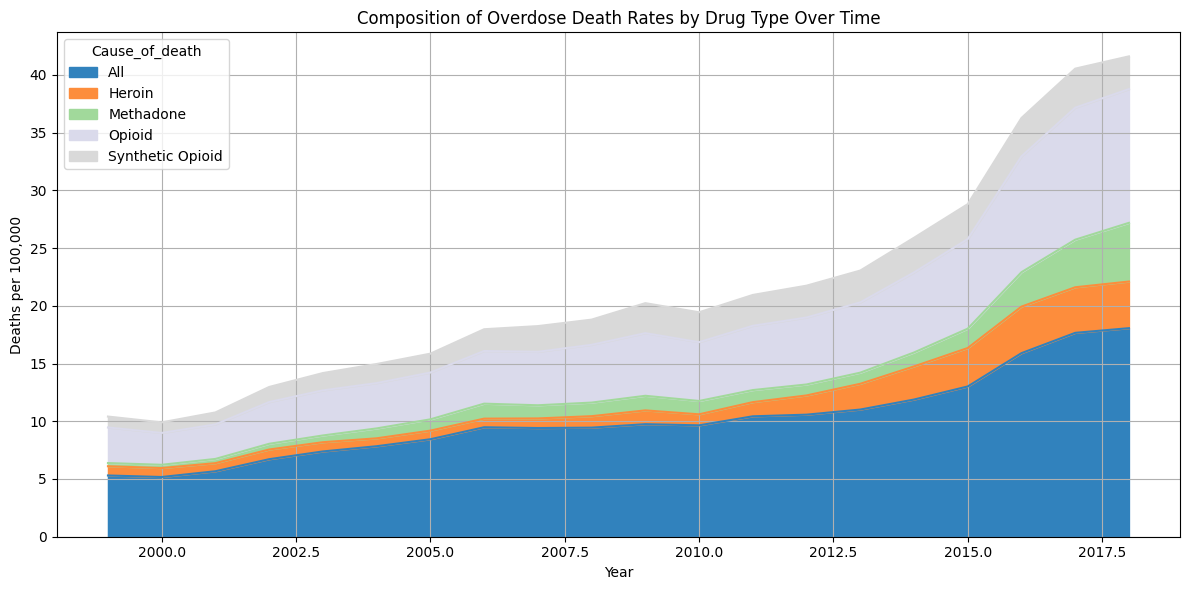

In [16]:
pivot_area = trend_by_cause.pivot(index='Year', columns='Cause_of_death', values='Estimate_Value').fillna(0)
pivot_area.plot.area(figsize=(12,6), colormap='tab20c')

plt.title('Composition of Overdose Death Rates by Drug Type Over Time')
plt.ylabel('Deaths per 100,000')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

This area chart shows how different drug types have contributed to the rising number of overdose deaths in the U.S. over time. Instead of showing separate trends like a line plot, this graph stacks each drug’s death rate on top of each other, giving us a view of the overall composition year by year. From the button up, the blue area at the bottom represents deaths from all drugs, and you can see a steady climb across the years, showing how overdose deaths overall have worsened.

The orange section shows deaths involving heroin, which remained quite flat for most of the early 2000s but started rising gently around 2010. It peaks between 2015–2017 and stays at that level. Just above it, the green band represents methadone, which becomes more noticeable after 2015. This might reflect its increased use in treatment, but also the risk of misuse or poor monitoring.

The purple area stands for opioids. It starts low but expands a lot after 2012, showing how opioids in general became a serious contributor to overdose deaths. But the most dramatic change is in the grey section — synthetic opioids — which takes off sharply after 2013 and becomes the widest section in recent years. This matches what’s known about fentanyl and similar drugs becoming a major threat (CDC, 2023).

So even though every layer is growing, synthetic opioids are clearly the main driver behind the rise. This composition view makes it clear that overdose deaths are no longer driven by just one drug — it’s a mix, and the mix is changing fast. Policies need to shift with it..

#### **Rate of Drug Overdose Death by Age Group**

In [17]:
age_groups = ['15-24 years', '25-34 years', '35-44 years', '45-54 years',
              '55-64 years', '65-74 years', '75-84 years', '85 years and over']

df_reg = df_reg.copy()
df_reg['Age_Group'] = df_reg['Age_Group'].str.strip()

# skip "All ages"
df_age_chart = df_reg[df_reg['Age_Group'].isin(age_groups)]

# group and reindex to keep consistent order
age_avg = df_age_chart.groupby('Age_Group')['Estimate_Value'].mean().reindex(age_groups).reset_index()

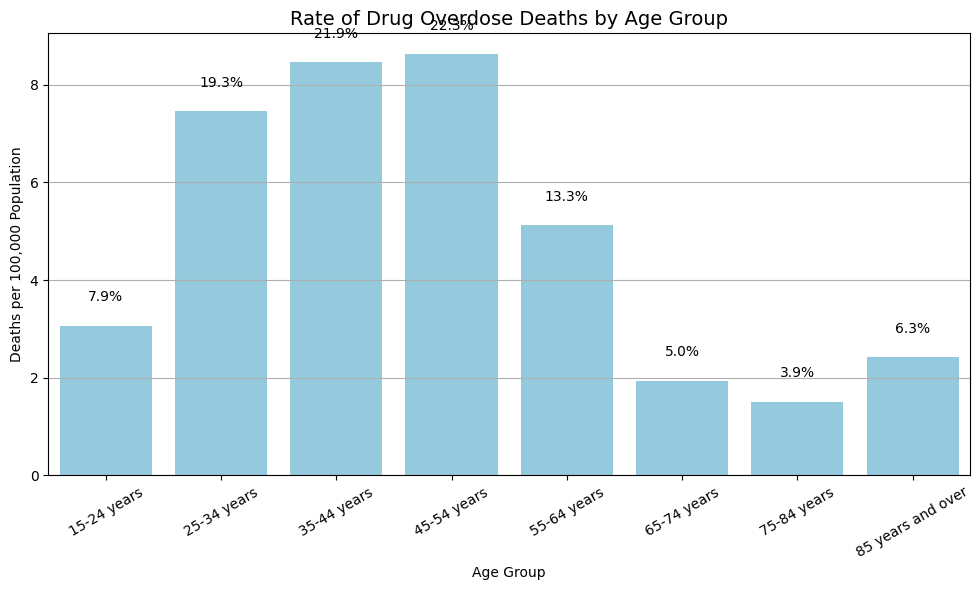

In [18]:
total = age_avg['Estimate_Value'].sum()
age_avg['Percent'] = (age_avg['Estimate_Value'] / total * 100).round(1) # Total sum of all death rates

plt.figure(figsize=(10,6))
barplot = sns.barplot(data=age_avg, x='Age_Group', y='Estimate_Value', color='skyblue')

# Add percentage labels on top of each bar
for index, row in age_avg.iterrows():
    barplot.text(index, row['Estimate_Value'] + 0.5, f"{row['Percent']}%",
                 color='black', ha="center", fontsize=10)

plt.title('Rate of Drug Overdose Deaths by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Deaths per 100,000 Population')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The bar plot shows a clear pattern in drug overdose death rates by age group. It highlights that people between the ages of 35 to 54 have the highest rates. These two groups (35–44 and 45–54) make up almost half of all drug-related deaths in this chart. That means middle-aged adults are the most affected by the overdose crisis.

We can see this clearly in the bar heights. The bars for age groups 35–44 and 45–54 are the tallest, followed closely by 25–34. This suggests that the most dangerous time for overdose risk is during the working-age years. It may be due to factors like stress, long-term drug use, or easier access to prescription and illegal drugs during these life stages.

The lower bars for older age groups don’t mean they’re not affected — in fact, there’s a slight rise again in the 85+ group. This could be linked to medication misuse or chronic pain treatment. Younger people aged 15–24 have lower death rates, but it's still worrying, especially with the rise in fake pills and fentanyl in that age group (O'Donnell et al., 2021).

This pattern aligns with studies that show overdose deaths have been climbing fastest among adults in their 30s, 40s, and 50s over the last decade (CDC, 2023). It shows the need for focused prevention targeting these groups, while also not ignoring the risks for both younger and older populations.

## **Conclusion**

This study uncovers clear demographic and drug-specific trends in U.S. overdose deaths. The data shows that middle-aged adults, particularly men, face the highest overdose risks — especially from opioids and synthetic drugs like fentanyl. While heroin and methadone still contribute, synthetic opioids are now the main driver of the crisis.

The consistent rise across most age groups and drug types, especially post-2013, highlights the urgent need for better interventions. Public health policies must shift from general campaigns to targeted strategies. For example, prevention efforts should focus on men aged 35–54, expand access to safe treatment options, and control high-risk prescriptions. At the same time, the rising rates among women and older adults mean those groups cannot be ignored.


**Some recommended actions include:**

- Tighter regulation on synthetic opioids and illegal supply tracking.

- Education and outreach tailored to middle-aged populations.

- Expansion of gender-specific addiction recovery programs.

- Routine overdose risk screenings in primary healthcare, especially for patients with chronic pain.

- Better data reporting, to capture nuances like gender, race, and drug type more accurately.

## **Reference**

1. CDC. (2023). Drug Overdose Deaths in the United States, 1999–2021. National Center for Health Statistics. https://www.cdc.gov/nchs/products/databriefs/db457.htm

2. Hedegaard, H., Miniño, A. M., & Spencer, M. R. (2022). Drug Overdose Deaths in the United States, 1999–2021. National Center for Health Statistics Data Brief, No. 457.

3. Bachhuber, M. A., Saloner, B., Cunningham, C. O., & Barry, C. L. (2016). Medical use, misuse, and overdose of prescription opioids among older adults. Journal of the American Geriatrics Society, 64(6), 1257–1262.

4. O’Donnell, J., Gladden, R. M., Mattson, C. L., Hunter, C. T., & Davis, N. L. (2021). Vital signs: Characteristics of drug overdose deaths involving opioids and stimulants—24 states and the District of Columbia, January–June 2019. MMWR. Morbidity and Mortality Weekly Report, 69(35), 1189.
